In [38]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.visualization import circuit_drawer


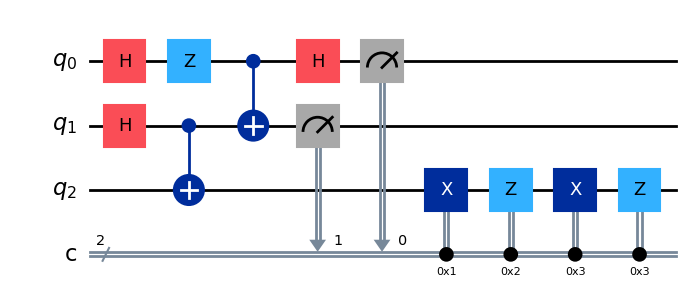

In [47]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(q, c)

#q[0], q[1] Alice's qubits
#q[2] Bob's qubit
#We're going to teleport the phase of the qubit q[0] to q[2]

# Prepare state to teleport (qubit de Alice)
circuit.h(q[0])  # Apply Hadamard for superposition
circuit.z(q[0])  # Apply Z gate to change phase

# Create entanglement between q[1] and q[2]
circuit.h(q[1])
circuit.cx(q[1], q[2])

# Teleport
# Create entaglement between q[0] and q[1]
circuit.cx(q[0], q[1])
circuit.h(q[0])

# Measure qubits
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])


# Conditional correction in Bob's qubit depending on q[0] and q[1] measures
# which are stored in c[0] and c[1]

# if result is 00 do nothing as it´s the original state of q[0]
circuit.x(q[2]).c_if(c, 1)  # if 01 apply X 
circuit.z(q[2]).c_if(c, 2)  # if 10 apply z
circuit.x(q[2]).c_if(c, 3)  # if 11 apply x, z
circuit.z(q[2]).c_if(c, 3)  
display(circuit.draw(output='mpl'))